In [ ]:
pip install trimesh pyvista matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.7/694.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 13.0 MB/s eta 0:00:00


In [ ]:
import pyvista as pv

obj_file = '/content/drive/MyDrive/Colab Notebooks/PotteryProject/Pottery10/Broken/01 Abstract_174/Abstractshape1.obj'
mesh = pv.read(obj_file)

print("Vertices:")
print(mesh.points)

print("Faces:")
print(mesh.faces)

# Display original odj file
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges=True)
plotter.show()


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


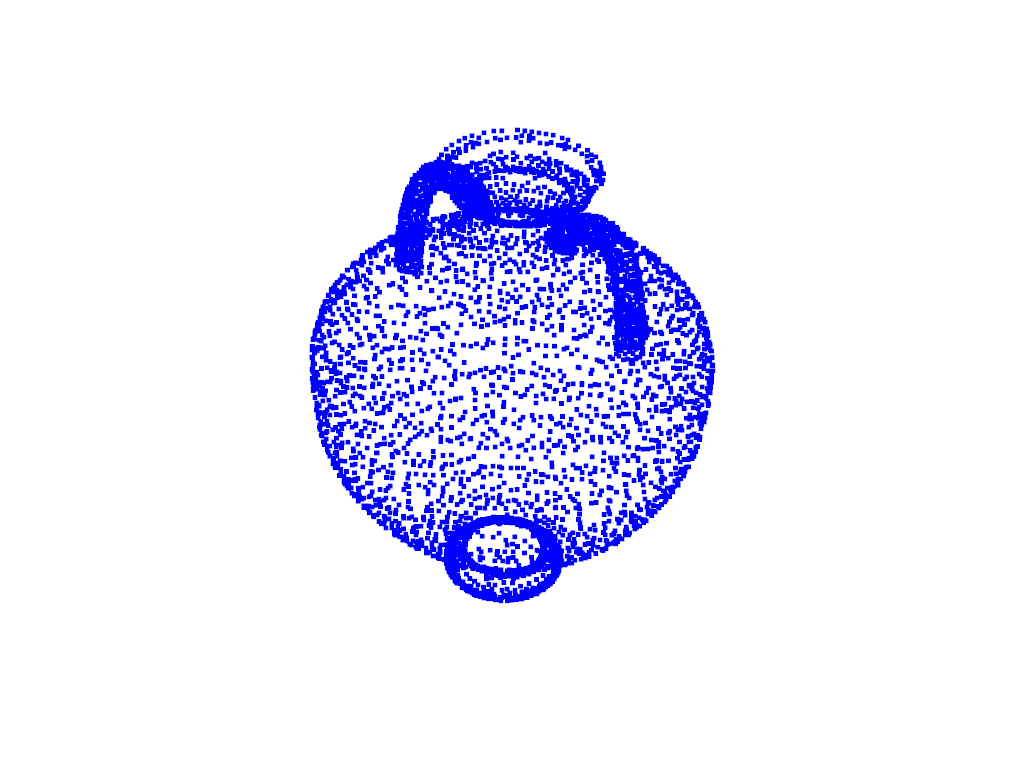

In [ ]:
# Convert to point cloud
points = mesh.points
point_cloud = pv.PolyData(points)

# Display
plotter = pv.Plotter()
plotter.add_points(point_cloud, color='blue', point_size=5)
plotter.show()

In [ ]:
# Convert to voxel
import numpy as np

def mesh_to_voxels(mesh, voxel_size=0.1):
    bounds = mesh.bounds
    x_min, x_max, y_min, y_max, z_min, z_max = bounds

    x_dim = int((x_max - x_min) / voxel_size)
    y_dim = int((y_max - y_min) / voxel_size)
    z_dim = int((z_max - z_min) / voxel_size)

    voxels = np.zeros((x_dim, y_dim, z_dim), dtype=bool)

    points = mesh.points

    for point in points:
        x_idx = int((point[0] - x_min) / voxel_size)
        y_idx = int((point[1] - y_min) / voxel_size)
        z_idx = int((point[2] - z_min) / voxel_size)

        if 0 <= x_idx < x_dim and 0 <= y_idx < y_dim and 0 <= z_idx < z_dim:
            voxels[x_idx, y_idx, z_idx] = True

    grid = pv.PolyData()
    for x in range(x_dim):
        for y in range(y_dim):
            for z in range(z_dim):
                if voxels[x, y, z]:
                    center = np.array([x, y, z]) * voxel_size + np.array([x_min, y_min, z_min])
                    cube = pv.Cube(center=center, x_length=voxel_size, y_length=voxel_size, z_length=voxel_size)
                    grid = grid + cube

    return grid

voxel_grid = mesh_to_voxels(mesh, voxel_size=0.1)

# Display
plotter = pv.Plotter()
plotter.add_mesh(voxel_grid, opacity=0.5, show_edges=True)
plotter.show()


KeyboardInterrupt: 